<a href="https://colab.research.google.com/github/nidjaj/Deep-learning/blob/master/ANN_bank_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
df=pd.read_csv('http://13.234.66.67/summer19/datasets/bank.csv')

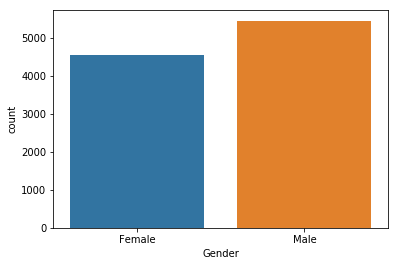

In [3]:
# countplot by seaborn
sb.countplot(df['Gender'])

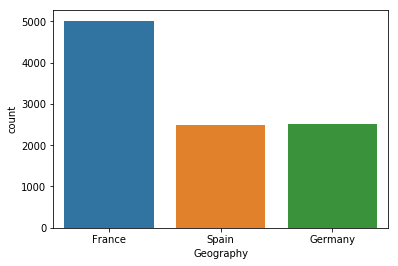

In [4]:
# compare countries
sb.countplot(df['Geography'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68a7656d30>,
      dtype=object)

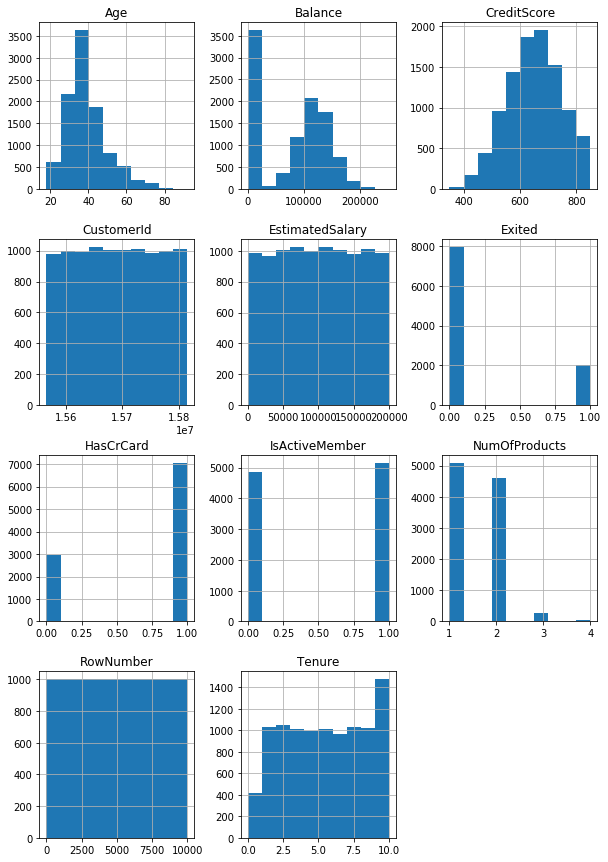

In [5]:
# histogrm
df.hist(figsize=(10,15))

In [0]:
# traning and label of data
features=df.iloc[0:,3:13].values

In [7]:
features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [0]:
# bank exit status that is enable
label=df.iloc[:,13].values

In [9]:
label

array([1, 0, 1, ..., 1, 1, 0])

In [0]:
# convert string data into numeric we can apply label encoding
from sklearn.preprocessing import LabelEncoder

In [0]:
country=LabelEncoder() # function call

In [0]:
features[0:,1]=country.fit_transform(features[0:,1])

In [13]:
features.shape

(10000, 10)

In [14]:
# same for gender
features[0:,2]=country.fit_transform(features[0:,2])
features.shape


(10000, 10)

In [15]:
features

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:
# creating dummy variable using onehot encoder
from sklearn.preprocessing import OneHotEncoder
counthot=OneHotEncoder(categorical_features=[1])


features1.shape

In [17]:
# fit and transform
features=counthot.fit_transform(features).toarray()
features1=features[:,1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [18]:
features1.shape

(10000, 11)

In [0]:
# traning and testing 
from sklearn.model_selection import train_test_split

In [0]:
X,x,Y,y=train_test_split(features1,label,test_size=0.2)

In [0]:
# feature scalling
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()

In [0]:
# traning and scale
X=sc.fit_transform(X)

In [0]:
x=sc.transform(x)

In [41]:
x.shape

(2000, 11)

In [42]:
X.shape

(8000, 11)

# now we can create ANN model

In [0]:
import keras # this is the way of using tensorflow in background


In [0]:
# keras ANN model library import
from keras.models import Sequential 

In [0]:
# filling data in each layer.. 
from keras.layers import Dense
# this will give the method to decide activation function and number of codes in each layer 
# including input ,hidden and output layer


In [0]:
# now we can design model
model=Sequential()

In [0]:
# now we can add input layer 
model.add(Dense(6,input_shape=(11,),activation='relu'))
# this relu means rectifier activation function




In [0]:
# adding one row hidden layer
model.add(Dense(6,activation='relu'))
# note we don't have to assign number of inputs after first /input layer

In [0]:
# final layer adding 
model.add(Dense(1,activation='sigmoid'))

In [0]:
#  compile 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# optimizer -- weight adjusting method -- stochitis g d(adam)


In [51]:
# traning data fit
model.fit(X,Y,batch_size=2000,epochs=100)

W0708 11:29:02.507596 140088242083712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.8054 - acc: 0.3896
Epoch 2/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7907 - acc: 0.4046
Epoch 3/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7758 - acc: 0.4236
Epoch 4/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7615 - acc: 0.4498
Epoch 5/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7478 - acc: 0.4659
Epoch 6/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7351 - acc: 0.4842
Epoch 7/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7230 - acc: 0.5028
Epoch 8/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7120 - acc: 0.5245
Epoch 9/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7015 - acc: 0.5458
Epoch 10/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.6917 - acc: 0.5683
Epoch 11/100
8000/

In [52]:
model.predict(x)

array([[0.39616668],
       [0.3099643 ],
       [0.10940841],
       ...,
       [0.06001726],
       [0.20676488],
       [0.10148191]], dtype=float32)